In [28]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import torch
import cv2

import os

import pytesseract

%matplotlib inline

In [38]:
np.random.seed(0)
test_images = np.random.choice(os.listdir('./data/images'), size=(5, 4), replace=False)
test_images

array([['Cars428.png', 'Cars20.png', 'Cars92.png', 'Cars387.png'],
       ['Cars107.png', 'Cars278.png', 'Cars233.png', 'Cars61.png'],
       ['Cars190.png', 'Cars327.png', 'Cars273.png', 'Cars308.png'],
       ['Cars408.png', 'Cars277.png', 'Cars336.png', 'Cars225.png'],
       ['Cars386.png', 'Cars266.png', 'Cars26.png', 'Cars208.png']], dtype='<U11')

In [30]:
best_weights = './yolo/main_best_964_51.pt'

model = torch.hub.load('ultralytics/yolov5', 'custom', best_weights)

Using cache found in C:\Users\koltu/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-18 Python-3.10.4 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [31]:
pytesseract.pytesseract.tesseract_cmd = r'D:\Python\tesseract\tesseract.exe' # поставить другой путь

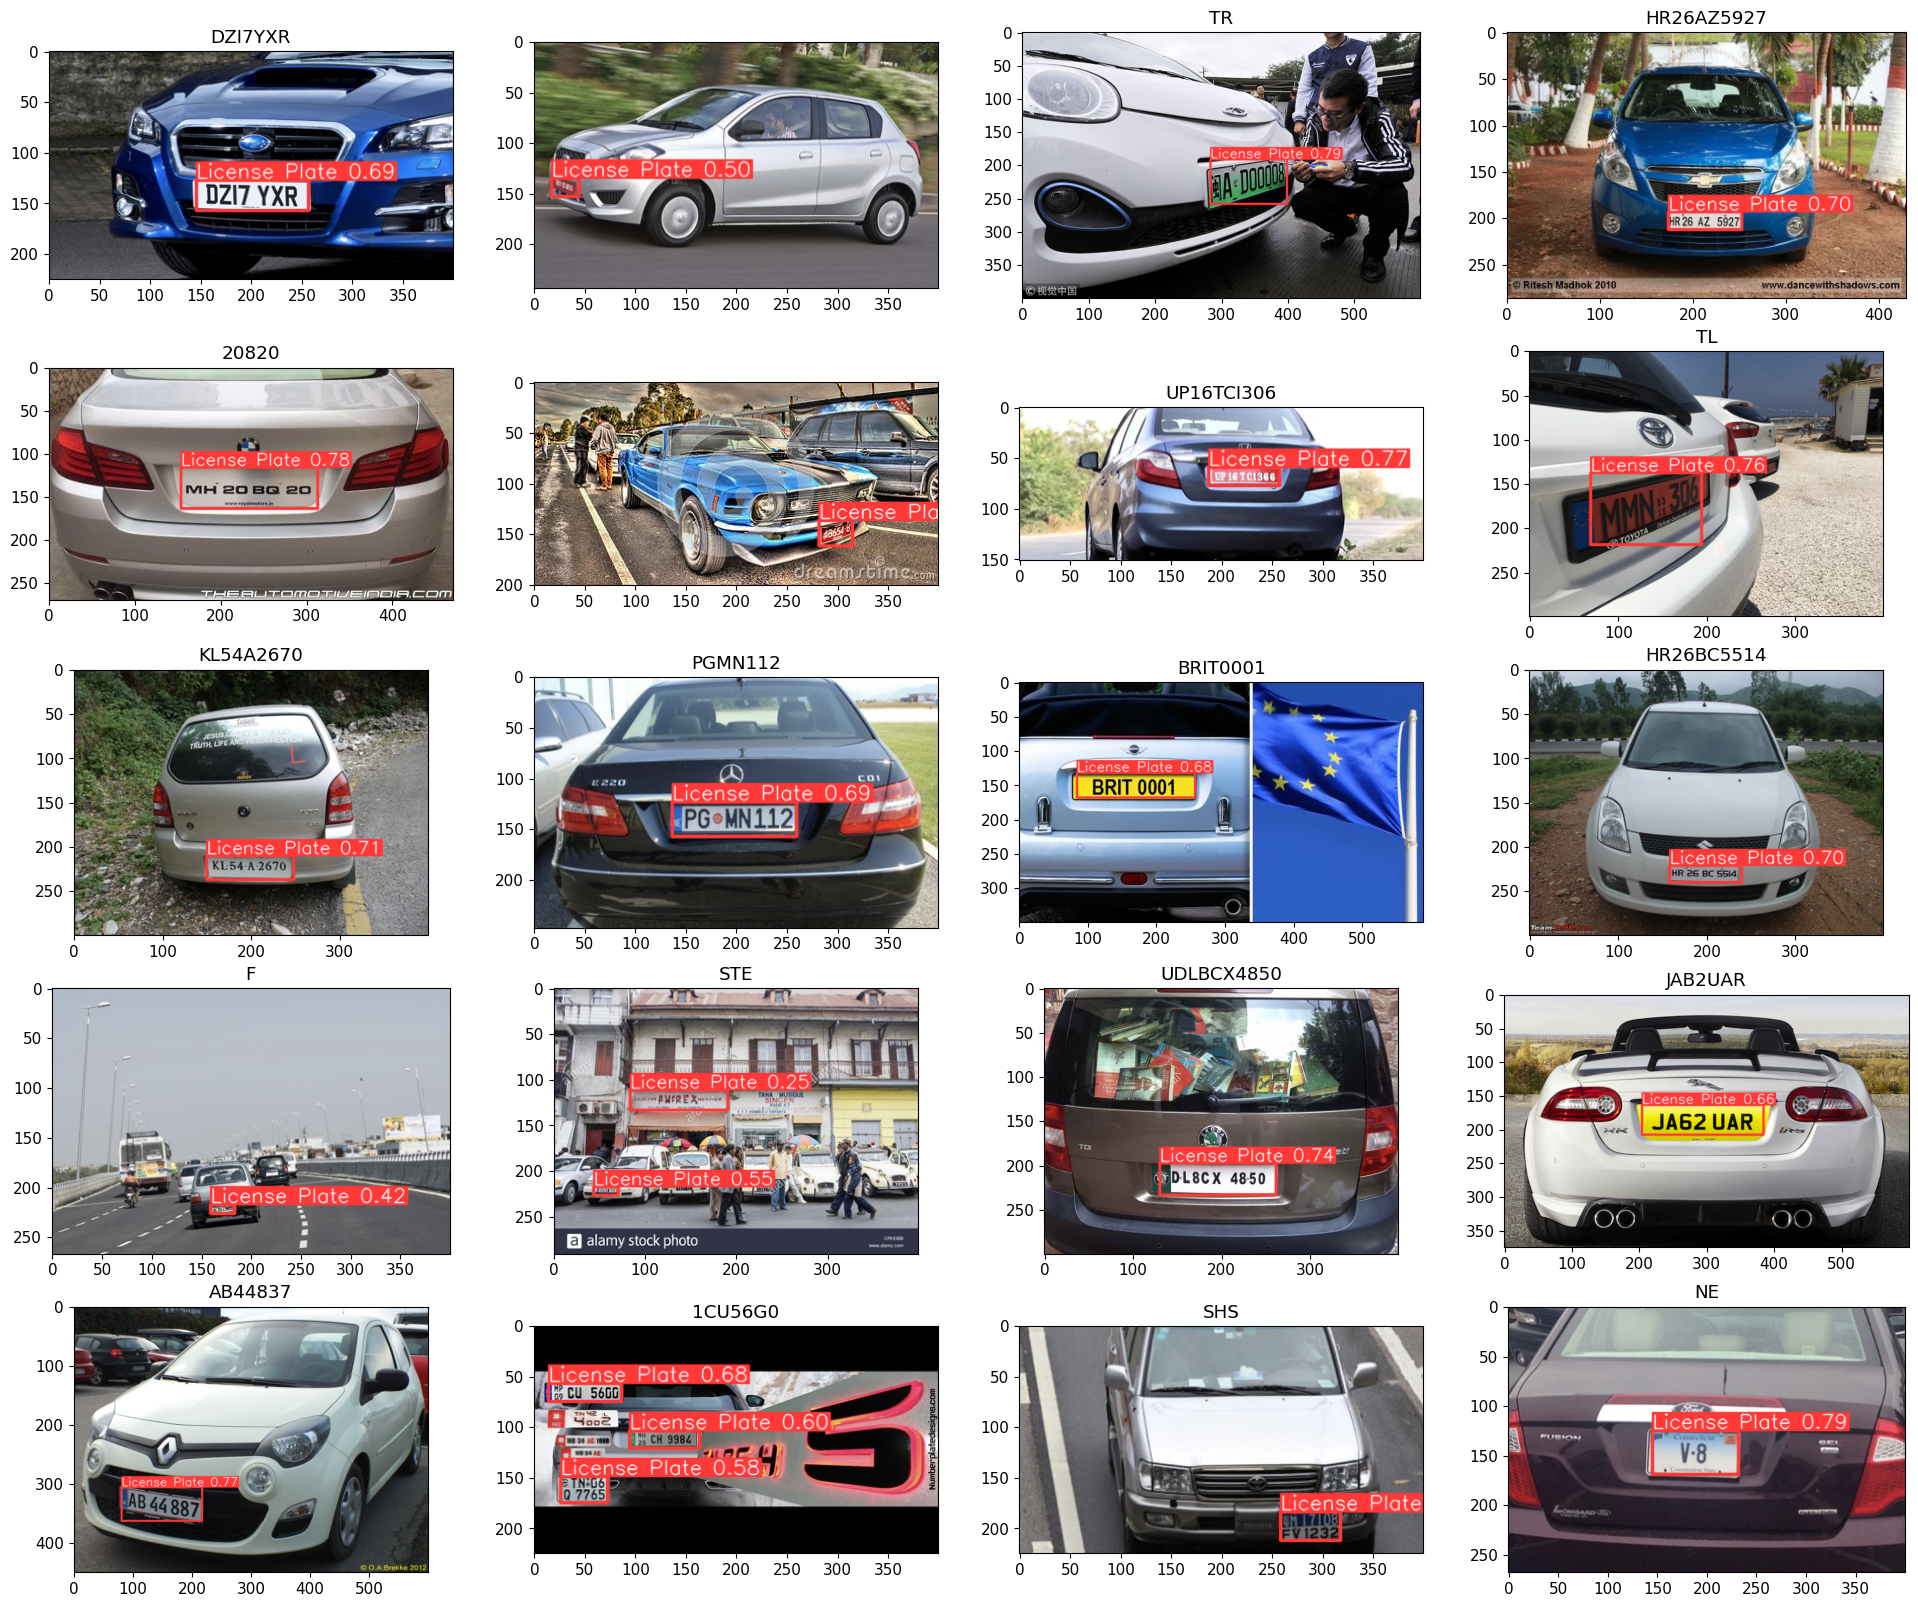

In [51]:
fig, ax = plt.subplots(figsize=(24,20), nrows=5, ncols=4)
# plt.figure(figsize=(24, 20))
for i in range(5):
    for j in range(4):
        # Reading the image
        image = cv2.imread(os.path.join('./data/images', test_images[i, j]))
        # Convert image to RGB colorspace
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Predicting from model
        results = model(image)
        # Getting coordinates of license plate
        results_df = results.pandas().xyxy[0].loc[0]
        x_min = int(results_df['xmin'])
        x_max = int(results_df['xmax'])
        y_min = int(results_df['ymin'])
        y_max = int(results_df['ymax'])
        # Cropping license plate from image ""
        number_plate = image[y_min:y_max,x_min:x_max]
        number_plate = cv2.resize(number_plate, (int(3*number_plate.shape[1]), int(3*number_plate.shape[0])))
        # Performing OCR on image
        # text = pt.image_to_string(number_plate)
        text = pytesseract.image_to_string(number_plate,
                                          config = f'--psm 13 --oem 1 '
                                                   f'-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
        # Showing the results
        ax[i,j].set_title(str(text).strip())
        ax[i,j].imshow(np.squeeze(results.render()))
plt.show()

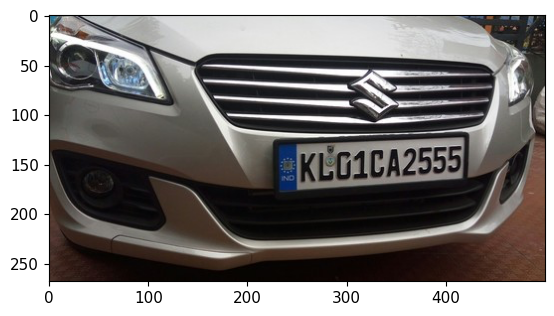

In [53]:
i = cv2.imread('./data/images/Cars0.png')
i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
plt.imshow(i)